In [1]:
import keras
keras.backend.backend()
import tensorflow as tf
from keras import backend as K
import keras
import numpy as np
import matplotlib.pyplot as plt
keras.backend.backend()


Using TensorFlow backend.


'tensorflow'

Для начала импортируем датасет из керас, он уже подготовлен и разбит на трейн и тест.

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape[1:]

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)

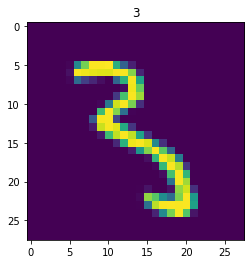

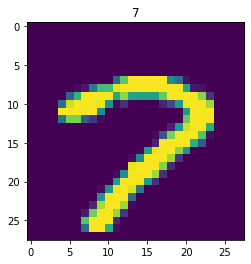

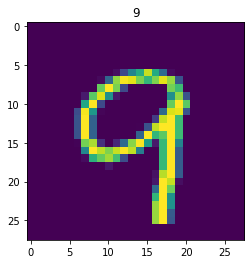

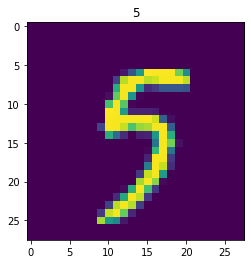

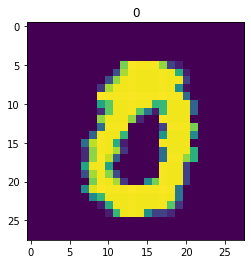

In [3]:
#отрисуем содержимое
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(x_train[i].reshape((28, 28)))
    plt.show()

In [0]:
#нормализуем данные
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


Теперь напишем функцию для генерации последовательностей и меток для них

In [0]:
def make_sequences(x, y):
  """   """
  num_of_sequences = x.shape[0]//10 #кол-во последовательностей
  schetchik = 0
  sequences = []   #массив для последовательностей
  answers = []     #массив для меток

  while schetchik != num_of_sequences:

    sequence = np.zeros(shape=(10, x.shape[1], x.shape[2]))
    answer = np.zeros(shape=(11,))
    indices = np.random.choice(x.shape[0], 10)
    key_val = y[indices[0]] + y[indices[1]]
    
    sequence[:10, :, :] = x[indices]
    answers.append(key_val)
    sequences.append(sequence)
    
    schetchik += 1
  
  return np.array(sequences), np.array(answers)



In [0]:
#создаем последовательности
X_train, y_train = make_sequences(x_train, y_train)
X_test, y_test = make_sequences(x_test, y_test)

In [0]:
#распрямляем картинку 28х28 в вектор 784 для подачи в нейронку
X_train = X_train.reshape(6000, 10, -1)
X_test = X_test.reshape(1000, 10, -1)

In [8]:
X_train.shape[1:], X_test.shape[1:]

((10, 784), (10, 784))

In [9]:
#посмотрим на метки - цифры от 0 до 18: всего 19 классов
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [0]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Bidirectional

In [0]:
# функция на случай, если надо подправить граф
def reset_tf_session():
    curr_session = tf.get_default_session()
    if curr_session is not None:
        curr_session.close()
    K.clear_session()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

 Дальше идут мои эксперименты, по результам которых мне, к сожалению, удалось добиться accuracy приблизительно 0.87. При этом модель сильно переобучается даже с дропаутом. Упрощение модели также не помогло: переобучение с более простой моделью только усилилось.

In [0]:
#функция для создания модели

def create_model(n_hidden = 256):
  model = Sequential()
  model.add(LSTM(n_hidden, input_shape=(X_train.shape[1:]), activation='relu', return_sequences=True))
  model.add(Dropout(0.25))

  model.add(LSTM(n_hidden, activation='relu', return_sequences=True ))
  model.add(Dropout(0.25))

  model.add(LSTM(n_hidden, activation='relu'))
  model.add(Dropout(0.25))


  model.add(Dense(32, activation='relu'))

  model.add(Dropout(0.3))

  model.add(Dense(19, activation='softmax'))
  return model

In [0]:
s = reset_tf_session()
model = create_model()

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
           metrics=['accuracy'])

In [0]:
epochs = 30
batch_size = 100
lr = 1e-3
decay = 1e-5

In [0]:
opt = tf.keras.optimizers.Adam(lr=lr, decay=decay)


In [54]:
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size = 100
          )

Train on 6000 samples, validate on 1000 samples
Epoch 1/30
6000/6000 [==============================] - 33s 5ms/sample - loss: 2.8964 - acc: 0.0898 - val_loss: 2.8486 - val_acc: 0.0780
Epoch 2/30
6000/6000 [==============================] - 33s 5ms/sample - loss: 2.8373 - acc: 0.0895 - val_loss: 2.7971 - val_acc: 0.0970
Epoch 3/30
6000/6000 [==============================] - 32s 5ms/sample - loss: 2.7245 - acc: 0.1015 - val_loss: 2.5050 - val_acc: 0.1270
Epoch 4/30
6000/6000 [==============================] - 32s 5ms/sample - loss: 2.5163 - acc: 0.1363 - val_loss: 2.3516 - val_acc: 0.1570
Epoch 5/30
6000/6000 [==============================] - 32s 5ms/sample - loss: 2.3999 - acc: 0.1502 - val_loss: 2.2648 - val_acc: 0.1590
Epoch 6/30
6000/6000 [==============================] - 32s 5ms/sample - loss: 2.1795 - acc: 0.2018 - val_loss: 1.9521 - val_acc: 0.2540
Epoch 7/30
6000/6000 [==============================] - 32s 5ms/sample - loss: 1.9902 - acc: 0.2470 - val_loss: 1.8537 - val_acc: 

In [56]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size = batch_size,
          )

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 32s 5ms/sample - loss: 0.1251 - acc: 0.9690 - val_loss: 1.3235 - val_acc: 0.8640
Epoch 2/10
6000/6000 [==============================] - 32s 5ms/sample - loss: 0.1316 - acc: 0.9702 - val_loss: 1.2532 - val_acc: 0.8430
Epoch 3/10
6000/6000 [==============================] - 33s 5ms/sample - loss: 0.0987 - acc: 0.9792 - val_loss: 1.3185 - val_acc: 0.8770
Epoch 4/10
6000/6000 [==============================] - 33s 6ms/sample - loss: 0.0944 - acc: 0.9788 - val_loss: 1.5599 - val_acc: 0.8470
Epoch 5/10
6000/6000 [==============================] - 33s 6ms/sample - loss: 0.1103 - acc: 0.9748 - val_loss: 1.8790 - val_acc: 0.8300
Epoch 6/10
6000/6000 [==============================] - 33s 6ms/sample - loss: 0.0957 - acc: 0.9765 - val_loss: 1.4639 - val_acc: 0.8660
Epoch 7/10
6000/6000 [==============================] - 33s 5ms/sample - loss: 0.0637 - acc: 0.9845 - val_loss: 1.9652 - val_acc: 

In [0]:
def create_model2(n_hidden = 128):
  model = Sequential()
  model.add(Bidirectional(LSTM(n_hidden, input_shape=(X_train.shape[1:]), activation='relu', dropout=0.25, return_sequences=True)))
  

  model.add(Bidirectional(LSTM(n_hidden, activation='relu', dropout=0.25, return_sequences=True )))


  model.add(Bidirectional(LSTM(n_hidden, activation='relu', dropout=0.25)))
 


  model.add(Dense(32, activation='relu'))

  model.add(Dropout(0.3))

  model.add(Dense(19, activation='softmax'))
  return model

In [0]:
s = reset_tf_session()
model2 = create_model2()

In [0]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),#(lr=lr, decay=decay),
           metrics=['accuracy'])

In [0]:
40 epochs (30+10)

In [195]:
model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size = 128, shuffle=True
          )

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 26s 4ms/sample - loss: 0.1826 - acc: 0.9500 - val_loss: 0.8655 - val_acc: 0.8480
Epoch 2/10
6000/6000 [==============================] - 26s 4ms/sample - loss: 0.1708 - acc: 0.9532 - val_loss: 0.8961 - val_acc: 0.8570
Epoch 3/10
6000/6000 [==============================] - 26s 4ms/sample - loss: 0.1534 - acc: 0.9578 - val_loss: 0.8903 - val_acc: 0.8480
Epoch 4/10
6000/6000 [==============================] - 26s 4ms/sample - loss: 0.1722 - acc: 0.9570 - val_loss: 0.8489 - val_acc: 0.8540
Epoch 5/10
6000/6000 [==============================] - 26s 4ms/sample - loss: 0.1594 - acc: 0.9563 - val_loss: 0.8394 - val_acc: 0.8420
Epoch 6/10
6000/6000 [==============================] - 26s 4ms/sample - loss: 0.1428 - acc: 0.9630 - val_loss: 0.9548 - val_acc: 0.8560
Epoch 7/10
6000/6000 [==============================] - 26s 4ms/sample - loss: 0.1321 - acc: 0.9672 - val_loss: 0.8646 - val_acc: 

In [0]:
def make_model4():

  model = Sequential()
  model.add(Bidirectional(LSTM(512, input_shape=(X_train.shape[1:]), activation='relu', return_sequences=True, dropout=0.25)))
  
  model.add(Bidirectional(LSTM(512, activation='relu', dropout=0.25)))
  #model.add(Dropout(0.25))


  #model.add(Dense(32, activation='relu'))
  #model.add(Dropout(0.25))

  model.add(Dense(19, activation='softmax'))
  return model

In [0]:
s = reset_tf_session()
model4 = make_model4()


In [0]:
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [79]:
model4.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size = 100
          )

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 154s 26ms/sample - loss: 2.7956 - acc: 0.0920 - val_loss: 2.7286 - val_acc: 0.1020
Epoch 2/10
6000/6000 [==============================] - 153s 25ms/sample - loss: 2.5300 - acc: 0.1373 - val_loss: 2.3544 - val_acc: 0.1780
Epoch 3/10
6000/6000 [==============================] - 152s 25ms/sample - loss: 2.1254 - acc: 0.2417 - val_loss: 1.9418 - val_acc: 0.3220
Epoch 4/10
6000/6000 [==============================] - 154s 26ms/sample - loss: 1.5574 - acc: 0.4770 - val_loss: 1.2279 - val_acc: 0.6110
Epoch 5/10
6000/6000 [==============================] - 155s 26ms/sample - loss: 1.0292 - acc: 0.6750 - val_loss: 0.8940 - val_acc: 0.7200
Epoch 6/10
6000/6000 [==============================] - 154s 26ms/sample - loss: 0.6908 - acc: 0.7842 - val_loss: 0.7387 - val_acc: 0.7820
Epoch 7/10
6000/6000 [==============================] - 155s 26ms/sample - loss: 0.5059 - acc: 0.8442 - val_loss: 0.68

In [0]:
model4.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), batch_size = 100
          )

Train on 6000 samples, validate on 1000 samples
Epoch 1/3
6000/6000 [==============================] - 158s 26ms/sample - loss: 0.0749 - acc: 0.9755 - val_loss: 0.8485 - val_acc: 0.8230
Epoch 2/3
6000/6000 [==============================] - 157s 26ms/sample - loss: 0.0916 - acc: 0.9707 - val_loss: 0.7916 - val_acc: 0.8300
Epoch 3/3
4100/6000 [===================>..........] - ETA: 47s - loss: 0.0544 - acc: 0.9822